[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter05/chapter05.ipynb)


# Support Vector Machines

**서포트 벡터 머신(SVM)**: 선형 또는 비선형 분류, 회귀, 이상치 탐지까지 수행  
복잡한 소규모 또는 중간 규모 데이터셋의 분류에 특히 적합

## Set up

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear SVM Classification

**선형 SVM 분류 (Linear SVM Classification)**

아래 그래프에서는 4장 끝부분에서 나온 iris 데이터셋의 일부를 보여 줌

두 클래스는 명확히 직선으로 쉽게 분리됨(선형적으로 구분 가능)

왼쪽 그림에서는 세 개의 가능한 선형 분류기의 결정 경계(decision boundary)

점선으로 표시된 모델은 너무 형편없어서 클래스조차 제대로 구분하지 못함

나머지 두 모델은 학습 데이터에 대해 완벽하게 작동하지만,  
결정 경계가 데이터 인스턴스에 너무 가까워서  
→ 새로운 데이터에 대해서는 성능이 떨어질 가능성이 높음

이에 비해, 오른쪽 그림의 실선으로 표시된 SVM 분류기의 결정 경계는  
두 클래스를 나누면서도 가장 가까운 훈련 인스턴스로부터 최대한 멀리 떨어져 있음

SVM 분류기는 두 클래스를 가로지르는
가장 넓은 도로(widest possible street)를 찾는 것처럼 작동  
(도로의 양 옆은 평행한 점선으로 나타남)

이를 **Large Margin Classification (큰 여백 분류)** 라고 함

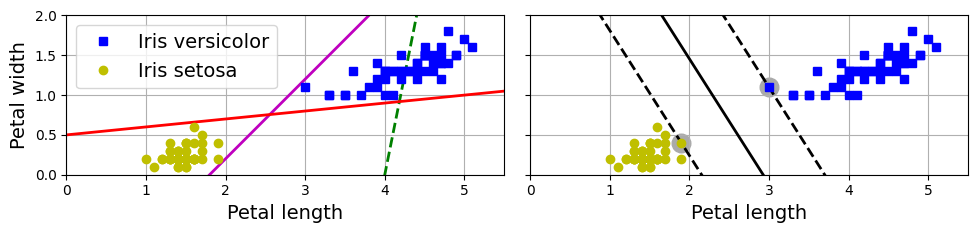

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# 데이터 불러오기 (아이리스 중 setosa vs versicolor만 사용)
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 선형 SVM 분류기 학습
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# 성능이 안 좋은 분류기 예시
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# SVM 결정 경계 및 마진 시각화 함수
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2)         # 결정 경계
    plt.plot(x0, gutter_up, "k--", linewidth=2)                # 위쪽 마진
    plt.plot(x0, gutter_down, "k--", linewidth=2)              # 아래쪽 마진
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA') # 서포트 벡터

# 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# 왼쪽: 잘못된 분류기 예시들
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

# 오른쪽: SVM의 large margin 분류기
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")  # 그림 저장 함수 (정의돼 있어야 작동함)
plt.show()


도로(street) 바깥에 더 많은 훈련 샘플을 추가하더라도 결정 경계에는 전혀 영향을 주지 않음  
→ 결정 경계는 도로의 경계에 위치한 샘플들만으로 완전히 결정됨(또는 지지됨)  
→ 이러한 샘플들을 **서포트 벡터(support vectors)** 라고 부름(위 그림의 원)

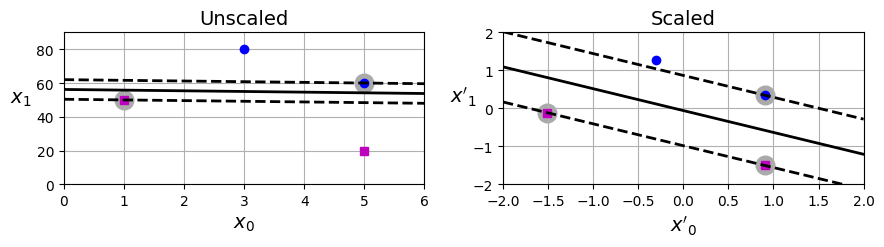

In [7]:
from sklearn.preprocessing import StandardScaler

# 간단한 2D 샘플 데이터 (x0, x1)
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])  # 클래스 라벨

# 스케일링 없이 선형 SVM 학습
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# 특성 스케일 조정 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

# 스케일링된 데이터로 선형 SVM 재학습
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))

# 왼쪽: 스케일 조정 전
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")  # 클래스 1
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")  # 클래스 0
plot_svc_decision_boundary(svm_clf, 0, 6)         # 결정 경계 시각화
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")  # 스케일 조정 전
plt.axis([0, 6, 0, 90])
plt.grid()

# 오른쪽: 스케일 조정 후
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")  # 스케일 조정 후
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")  # 그림 저장
plt.show()


SVM은 특성 스케일(feature scale)에 민감함

왼쪽 그림에서는 세로 축 범위가 가로 축보다 훨씬 큼  
→ 따라서 가능한 가장 넓은 도로는 수평에 가깝게 형성됨

Scikit-Learn의 StandardScaler 같은 방법으로 특성 스케일을 조정한 뒤에는  
→ 오른쪽 그림처럼 결정 경계가 훨씬 더 적절하게 보임

### Soft Margin Classification

**하드 마진 분류(hard margin classification)**: 모든 샘플이 도로(street) 바깥에 있어야 하고, 또한 올바른 쪽에 위치해야 한다는 조건을 엄격하게 적용

하드 마진 분류의 두 가지 문제
1. 데이터가 선형적으로 완벽히 분리(linearly separable) 되어 있어야만 작동함
2. 이상치(outlier)에 매우 민감함

다음 그림에서는 아이리스 데이터셋에 이상치 한 개만 추가된 상황을 보여 줌



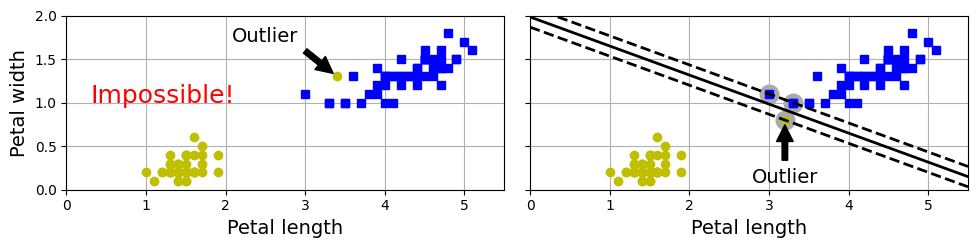

In [8]:
# 이상치(outlier) 2개 추가
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# 첫 번째 이상치만 포함 (하드 마진 불가능한 경우)
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# 두 번째 이상치만 포함 (마진이 왜곡되는 경우)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# 하드 마진 SVM 학습
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# 왼쪽: 이상치 때문에 완벽 분리가 불가능한 상황
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()

# 오른쪽: 이상치로 인해 결정 경계가 크게 왜곡된 경우
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate("Outlier", xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()


왼쪽 그림에서는 하드 마진을 만족하는 분류 경계를 찾을 수 없음

오른쪽 그림에서는 결정 경계가 이상치의 영향으로 많이 달라짐  
→ 아까 그림에서 봤던 결정 경계와는 매우 다름  
→ 결과적으로 일반화 성능이 나빠질 가능성이 높음

이러한 문제들을 피하기 위해서는 좀 더 유연한 모델을 사용하는 것이 좋음
목표는 다음 두 가지 사이의 좋은 균형을 찾는 것:

1. 도로(street)를 최대한 넓게 유지함
2. 마진 위반(margin violation)을 줄임  
→ 즉, 샘플이 도로 한가운데나 잘못된 쪽에 위치하는 상황 제한

이러한 방식을 **소프트 마진 분류(soft margin classification)**



In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 아이리스 데이터 불러오기
iris = load_iris(as_frame=True)

# 특성: 꽃잎 길이와 너비 / 타깃: Iris virginica 여부 (이진 분류)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # virginica면 True, 아니면 False

# SVM 분류기 구성: 표준화 + 선형 SVM
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))

# 모델 학습
svm_clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [10]:
X_new = [[5.5, 1.7], [5.0, 1.5]]  # 예측에 사용할 새로운 꽃잎 길이/너비 샘플
svm_clf.predict(X_new)           # 각 샘플이 Iris virginica인지 예측 (True/False)


array([ True, False])

In [11]:
svm_clf.decision_function(X_new)  # 각 샘플에 대한 결정 점수 출력 (양수면 클래스 1, 음수면 클래스 0)


array([ 0.66163411, -0.22036063])

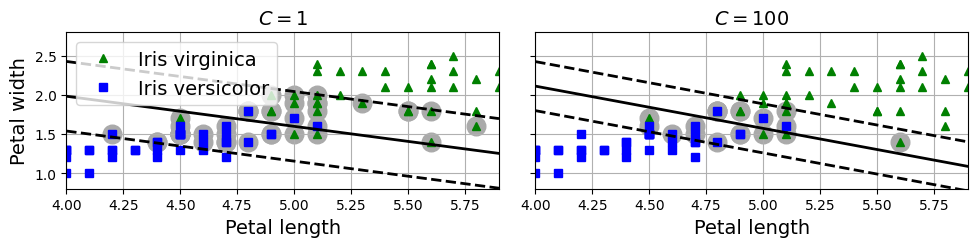

In [12]:
# 표준화 + 서로 다른 C 값을 가진 SVM 모델 생성
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

# 파이프라인 구성
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

# 모델 학습 (스케일링 포함)
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일링 되지 않은 공간에서 파라미터 계산 (해석용)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# LinearSVC는 서포트 벡터 정보를 제공하지 않으므로 직접 계산
t = y * 2 - 1  # 클래스: 0 → -1, 1 → +1
support_vectors_idx1 = (t.to_numpy() * (X.dot(w1) + b1) < 1)
support_vectors_idx2 = (t.to_numpy() * (X.dot(w2) + b2) < 1)
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# 결과 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# C = 1 결과
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# C = 100 결과
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()


Scikit-Learn에서 SVM 모델을 만들 때는 여러 하이퍼파라미터를 설정할 수 있는데
그중 하나가 C

- C를 작게 설정하면 → 위 그래프의 왼쪽처럼 나옴
- C를 크게 설정하면 → 오른쪽처럼 나옴

마진 위반은 바람직하지 않으므로 적을수록 좋음  
하지만 이 경우에는 왼쪽 모델이 마진 위반은 많지만, 일반화 성능은 더 좋을 가능성이 있음

만약 SVM 모델이 과적합(overfitting) 되고 있다면, C 값을 낮춰서 정규화(regularization) 하는 것을 시도할 수 있음

다음은 Scikit-Learn 코드로, 아이리스(iris) 데이터셋을 불러오고, 특성(feature)을 스케일링한 다음, 선형 SVM 모델(LinearSVC 클래스, C=1, hinge 손실 함수)을 사용해 Iris virginica 품종을 판별하는 훈련 수행



```
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이와 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica인지 여부

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

```

이렇게 학습된 모델은 위 그래프 왼쪽에 시각화

예측

```
svm_clf.predict([[5.5, 1.7]])
# 결과: array([1.])

```

Logistic Regression과는 달리  
**SVM 분류기(SVM classifier)**는 각 클래스에 대한 확률을 출력하지 않음



- LinearSVC 대신 SVC 클래스 사용: SVC(kernel="linear", C=1)

- SGDClassifier 클래스 사용: SGDClassifier(loss="hinge", alpha=1/(m*C))

일반적인 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 선형 SVM 분류기 학습

LinearSVC만큼 빠르게 수렴하진 않지만, 다음과 같은 상황에서 유용
- 온라인 분류(online classification)
- 메모리에 올릴 수 없을 정도로 큰 데이터셋 (out-of-core training)

LinearSVC 클래스는 **절편 항(bias term)**도 정규화(regulazation)함  
따라서 훈련 세트를 평균 중심으로 이동(center)시켜야  
→ StandardScaler를 사용하면 자동으로 처리됨

loss 하이퍼파라미터는 기본값이 "hinge"가 아니기 때문에 명시적으로 지정해야 함

그리고 더 나은 성능을 위해서는 dual=False로 설정하는 것이 좋음  
특성 수가 훈련 샘플 수보다 많을 경우에는 예외(이건 뒤에서 다룸)

## Nonlinear SVM Classification

비록 선형 SVM 분류기가 효율적이고 많은 경우에서 잘 작동하지만,  
많은 데이터셋은 선형적으로 구분(linearly separable)되지 않기도 함

비선형(nonlinear) 데이터셋을 다루는 한 가지 방법은: 특성을 더 추가하는 것   
4장에서 했던 것처럼 **다항 특성(polynomial features)**을 추가하는 방법  
일부 경우에는 이렇게 하면 선형적으로 구분 가능한 데이터셋으로 변환될 수 있음

위 그래프의 왼쪽 그림은 단 하나의 특성 x₁을 가진 간단한 데이터셋  
이 데이터셋은 선형적으로 구분할 수 없음 —

하지만 두 번째 특성으로 x₂ = (x₁)²을 추가하면, 결과적으로 만들어진 2차원 데이터셋은 완전히 선형적으로 구분 가능

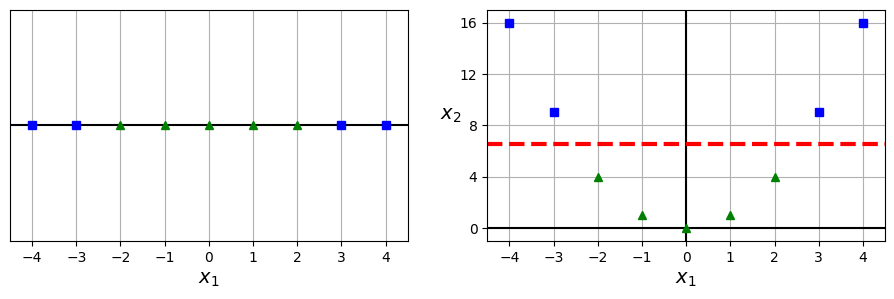

In [13]:
# 1차원 입력 데이터 생성
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# 2차원 데이터 생성: x₂ = x₁² 추가
X2D = np.c_[X1D, X1D**2]

# 타겟 레이블 정의 (0 또는 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

# 왼쪽 그림: 원래의 1차원 데이터
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # x축
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")  # 클래스 0: 파란 사각형
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")  # 클래스 1: 초록 삼각형
plt.gca().get_yaxis().set_ticks([])  # y축 눈금 제거
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

# 오른쪽 그림: x₁, x₂=(x₁)² 2차원 공간으로 변환한 데이터
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')  # x축
plt.axvline(x=0, color='k')  # y축
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")  # 클래스 0
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")  # 클래스 1
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # 선형 결정 경계
plt.axis([-4.5, 4.5, -1, 17])

# 전체 레이아웃 조정
plt.subplots_adjust(right=1)

# 그림 저장 및 출력
save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()


Scikit-Learn을 사용하여 이 아이디어를 구현하기 위해 PolynomialFeatures 변환기 다음에  
StandardScaler와 LinearSVC를 포함하는 Pipeline을 생성

데이터셋: 이진 분류를 위한 장난감 데이터셋으로 데이터 포인트들이 두 개의 서로 엇갈린 반원 형태로 구성

make_moons() 함수를 사용하여 데이터셋 생성 가능

In [14]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# 반달 모양 데이터 생성 (노이즈 포함)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),              # 3차 다항 특성 생성
    StandardScaler(),                          # 표준화
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)  # 선형 SVM 학습
)

polynomial_svm_clf.fit(X, y)  # 모델 훈련


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

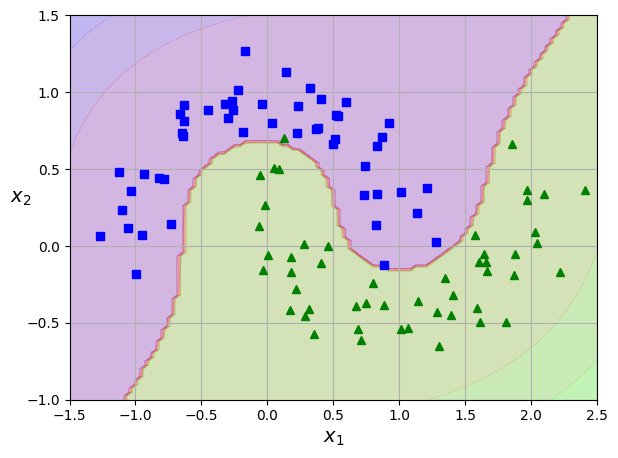

In [15]:
def plot_dataset(X, y, axes):
    # 클래스별 데이터 시각화
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    # 예측 및 결정 함수 시각화를 위한 그리드 생성
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    # 예측 결과 및 결정 함수 값 계산
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # 분류 경계와 결정 함수 시각화
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# 예측 결과 및 데이터 시각화
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()


### Polynomial Kernel

다항 특성을 추가하는 것은 구현이 간단하며 SVM뿐 아니라 다양한 머신러닝 알고리즘과 잘 작동함

하지만 다항 차수가 낮을 경우 매우 복잡한 데이터셋을 처리할 수 없음  
차수가 높을 경우 특성의 수가 폭발적으로 증가하여 모델이 매우 느려짐

SVM을 사용할 때는 **커널 트릭**이라 불리는 수학적 기법을 적용할 수 있음

- 커널 트릭은 실제로 많은 다항 특성을 추가하지 않고도 마치 추가한 것과 같은 효과를 얻을 수 있게 해 줌
- 따라서 특성 수의 조합적 폭발이 발생하지 않음
- 왜냐하면 실제로 어떤 특성도 추가하지 않기 때문
- 이 트릭은 SVC 클래스에 의해 구현되어 있음


In [16]:
from sklearn.svm import SVC

# 3차 다항 커널을 사용하는 SVM 분류기 구성 및 학습
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),                      # 특성 표준화
    SVC(kernel="poly", degree=3, coef0=1, C=5)  # 다항 커널 SVM 설정
)
poly_kernel_svm_clf.fit(X, y)  # 모델 훈련


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

이 코드는 3차 다항 커널을 사용하는 SVM 분류기를 학습시킴 (다음 그래프의 왼쪽)  
오른쪽에는 10차 다항 커널을 사용하는 또 다른 SVM 분류기

모델이 과적합되고 있다면 다항 차수를 줄이는 것이 좋음   과소적합이라면 차수를 늘려볼 수 있음

하이퍼파라미터 coef0: 고차 다항식과 저차 다항식 중 어느 쪽에 더 영향을 받을지를 조절


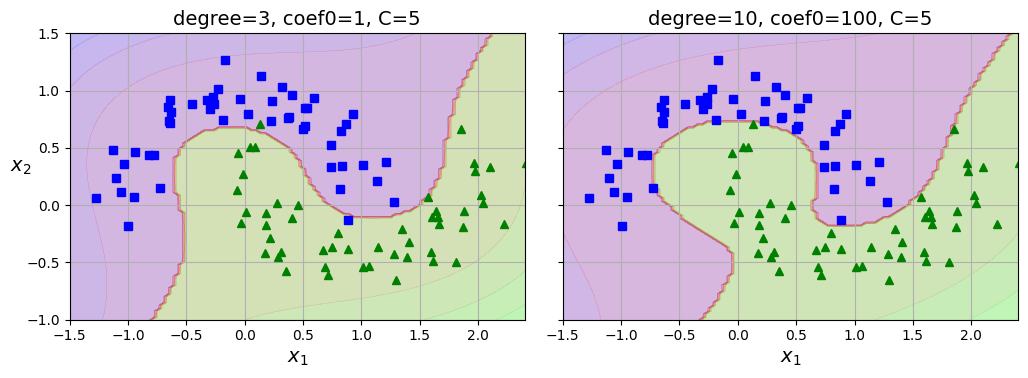

In [17]:
# 10차 다항 커널을 사용하는 SVM 분류기 학습
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

# 두 모델의 예측 결과를 나란히 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")  # 3차 커널 결과

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")  # 10차 커널 결과
plt.ylabel("")

# 그래프 저장 및 출력
save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()



적절한 하이퍼파라미터 값을 찾는 일반적인 접근 방식: **그리드 서치(grid search)** 사용

보통은 먼저 거친 그리드 서치를 수행한 다음  
최적값 주변에서 더 세밀한 그리드 서치를 수행

### Similarity Features

비선형 문제를 다루는 또 다른 기법  
-> 유사도 함수를 사용해 계산한 특성을 추가  
이 함수는 각 샘플이 특정 랜드마크와 얼마나 유사한지 측정

예를 들어 앞서 다룬 1차원 데이터셋에 대해 랜드마크 두 개를 $x_1 = -2$와 $x_1 = 1$에 추가한다고 가정(아래 그래프의 왼쪽 참고)

그다음 유사도 함수로 **가우시안 RBF(Radial Basis Function)** 정의, γ는 0.3으로 설정

$$
\phi_{\gamma}(\mathbf{x}, \ell) = \exp\left(-\gamma \lVert \mathbf{x} - \ell \rVert^2\right)
$$



이 함수는 종 모양 형태로 랜드마크에서 멀수록 0에 가까워지고, 랜드마크 위치에서는 1에 도달

예를 들어
$x_1 = 1$인 샘플을 보면 첫 번째 랜드마크에서 거리 1,   
두 번째 랜드마크에서 거리 2 떨어져 있음

따라서 이 샘플의 새 특성은
- $x_2 = \exp(-0.3 \cdot 1^2) \approx 0.74$
- $x_3 = \exp(-0.3 \cdot 2^2) \approx 0.30$

그림 오른쪽은 변환된 데이터셋(기존 특성 제거)  
이제 선형적으로 구분 가능

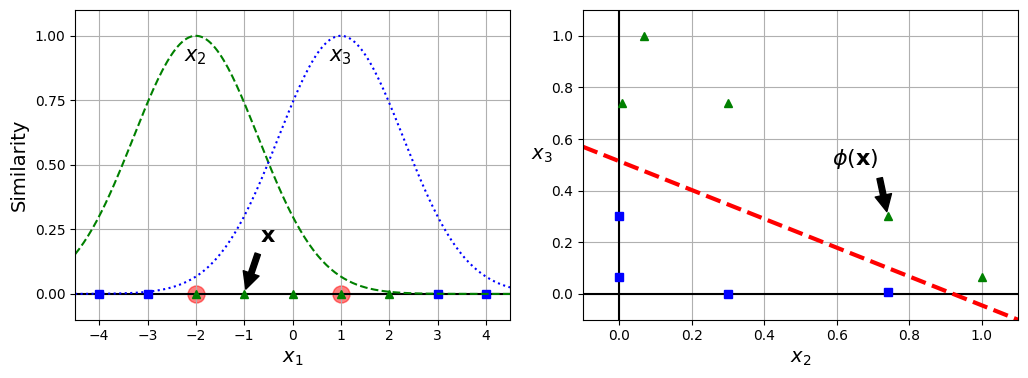

In [18]:
def gaussian_rbf(x, landmark, gamma):
    # 가우시안 RBF 유사도 함수 계산
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# 1차원 입력값 생성
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
# 두 랜드마크에 대한 유사도 계산
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# 변환된 특성 공간 구성
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

# 원래 1D 데이터와 랜드마크 기반 유사도 시각화
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # x축 기준선
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")  # 랜드마크 표시
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")  # 클래스 0
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")  # 클래스 1
plt.plot(x1s, x2s, "g--")  # 첫 번째 랜드마크 유사도 곡선
plt.plot(x1s, x3s, "b:")   # 두 번째 랜드마크 유사도 곡선
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# 유사도 기반으로 변환된 특성 공간 시각화
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")  # 클래스 0
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")  # 클래스 1
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
# 선형 결정 경계 시각화
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

# 이미지 저장 및 출력
save_fig("kernel_method_plot")
plt.show()


랜드마크를 어떻게 선택하는가?

가장 단순한 방법은 데이터셋의 모든 샘플 위치에 각각 하나씩 랜드마크를 만드는 것

이렇게 하면 차원이 매우 많아지고, 그 결과 변환된 훈련셋이 선형적으로 구분될 가능성 높아짐

단점은 샘플 수가 𝑚, 특성 수가 𝑛일 때 원래 특성을 제거한다고 가정하면  
훈련셋이 𝑚개의 샘플과 𝑚개의 특성을 가지게 됨

훈련셋이 아주 큰 경우 특성 수도 그만큼 커짐

### Gaussian RBF Kernel


다항 특성과 마찬가지로 유사도 특성 기법도 다양한 머신러닝 알고리즘에 활용 가능

하지만 훈련셋이 크면 추가 특성 계산에 많은 연산 비용 발생

이럴 때도 커널 트릭이 SVM에서 유용하게 작동함 유사도 특성을 많이 추가한 것과 비슷한 효과를 계산 없이 얻을 수 있음

▽ 가우시안 RBF 커널을 사용하는 SVC 모델

In [19]:
# RBF 커널을 사용하는 SVM 분류기 구성 및 학습
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),                    # 특성 표준화
    SVC(kernel="rbf", gamma=5, C=0.001)  # RBF 커널 SVM 설정
)
rbf_kernel_svm_clf.fit(X, y)  # 모델 훈련


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

이 모델은 아래 그래프의 왼쪽 아래에 시각화

다른 그림들은 gamma(γ)와 C 값을 달리한 모델들 보여 줌

gamma를 크게 하면 종 모양 커널이 좁아짐  
각 샘플의 영향 범위 작아지고 결정 경계가 샘플 하나하나를 따라 더 불규칙하게 변함

gamma가 작으면 커널이 넓어지고 영향 범위 커짐   
결정 경계는 더 부드러워짐

즉 gamma는 정규화 역할을 하는 하이퍼파라미터처럼 작동  
과적합이면 gamma 줄이고 과소적합이면 gamma 늘리는 방식으로 조절 가능(C 파라미터와 유사)

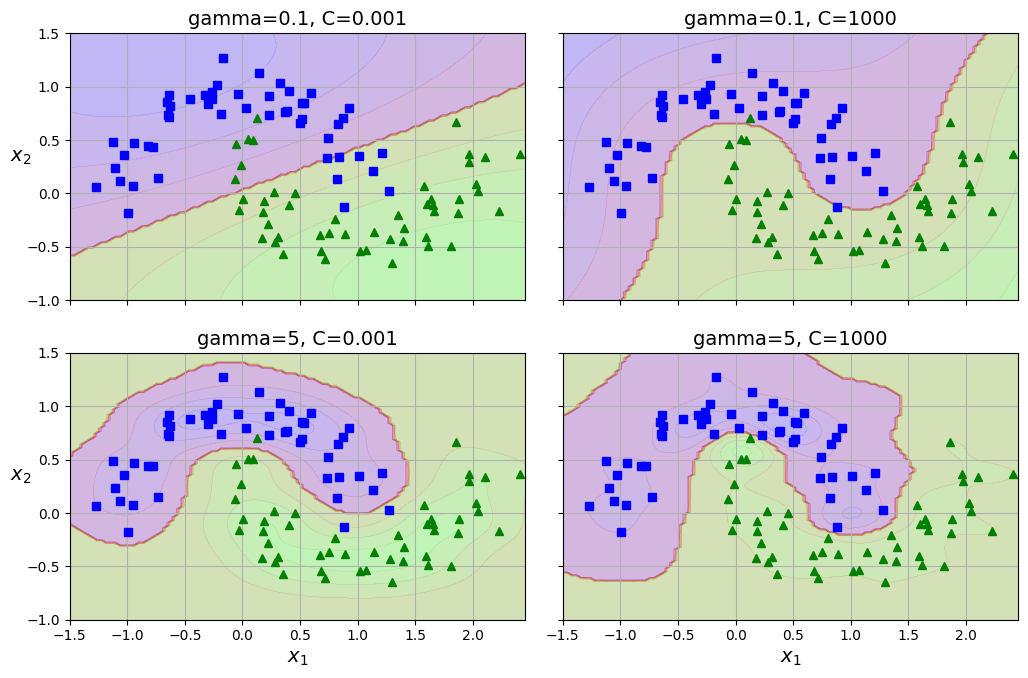

In [20]:
from sklearn.svm import SVC

# 네 가지 하이퍼파라미터 조합 정의 (gamma, C)
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# 각 조합으로 SVM 모델 학습
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# 2x2 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

# 각 모델 결과 시각화
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

# 결과 저장 및 출력
save_fig("moons_rbf_svc_plot")
plt.show()


다른 커널들도 존재하지만 훨씬 덜 사용됨

일부 커널은 특정 데이터 구조에 특화
예를 들어 문자열 커널은 텍스트 문서나 DNA 서열 분류 시 가끔 사용  
(string subsequence kernel이나 Levenshtein 거리 기반 커널 등)


이처럼 커널이 많을 때 어떤 걸 선택할지 어떻게 판단할 수 있을까?

일반적인 기준으로는 항상 선형 커널을 먼저 시도하는 것이 좋음  
(특히 훈련셋이 매우 크거나 특성이 많은 경우에는 SVC(kernel="linear")보다 LinearSVC가 훨씬 빠름)

훈련셋이 너무 크지 않다면 가우시안 RBF 커널도 함께 시도해 볼 만함
대부분의 경우에서 잘 작동

시간과 자원이 충분하다면 교차 검증과 그리드 서치를 통해 다른 커널들도 실험 가능
특히 훈련 데이터 구조에 특화된 커널이 있다면 그런 경우엔 실험해 볼 가치 있음

### Computational Complexity

LinearSVC 클래스는 liblinear 라이브러리 기반
이 라이브러리는 선형 SVM을 위한 최적화된 알고리즘 구현

커널 트릭은 지원하지 않지만, 훈련 샘플 수와 특성 수에 거의 선형적으로 확장
학습 시간 복잡도는 대략 𝑂(𝑚×𝑛)

정밀도를 높게 요구할수록 학습 시간은 길어짐  
이는 허용 오차 하이퍼파라미터 𝜖(Scikit-Learn에서는 tol)로 조절 가능  
일반적인 분류 문제에서는 기본값으로 충분

SVC 클래스는 libsvm 라이브러리 기반
이 라이브러리는 커널 트릭을 지원하는 알고리즘 구현

학습 시간 복잡도는 보통 𝑂(𝑚^2×𝑛)에서 𝑂(𝑚^3×𝑛) 사이  
-> 샘플 수가 많아질수록 학습이 매우 느려짐  
(예: 수십만 개 이상의 샘플이 있는 경우)

이 알고리즘은 복잡하지만 크기가 작거나 중간 정도인 훈련셋에 적합  
특성 수가 많아도 잘 작동  
특히 희소 특성(대부분 0인 경우)에서는 효율적으로 작동  
이 경우 평균적으로 nonzero 특성 수에 비례해서 확장  

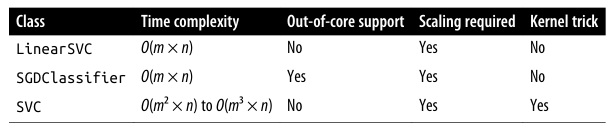

## SVM Regression

SVM 알고리즘은 선형 및 비선형 분류를 지원할 뿐 아니라, 선형 및 비선형 회귀도 가능

SVM을 분류가 아닌 회귀에 사용하는 핵심: 목적을 역전시키는 것(reverse the objective)  
- 분류: 가능한 한 두 클래스 사이에 가장 넓은 마진(거리)을 만들고
그 마진을 벗어나는 경우(마진 위반)를 최소화하려고 함
- SVM 회귀: 가능한 많은 샘플이 마진 안에 위치하도록 선을 맞춤  
즉, 도로 안에 데이터를 최대한 많이 넣고, 도로 밖에 있는 샘플(마진 위반)을 줄이려고 함

도로의 너비는 하이퍼파라미터 𝜖으로 조절

아래 그래프는 무작위 선형 데이터에 대해 학습된 두 개의 선형 SVM 회귀 모델을 보여줌  
하나는 넓은 마진(𝜖=1.2), 다른 하나는 좁은 마진(𝜖=0.5)

마진 안에 있는 훈련 샘플을 더 추가해도 모델의 예측에는 영향을 주지 않음  
그래서 SVM 회귀는 ϵ-insensitive(ϵ-무감각)하다고 표현

선형 SVM 회귀는 Scikit-Learn의 LinearSVR 클래스로 수행 가능  
(훈련 데이터는 스케일 조정 및 중심화 되어야)


In [21]:
from sklearn.svm import LinearSVR

# 선형 데이터 생성 (y = 4 + 3x + 약간의 잡음)
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

# 선형 SVM 회귀 모델 구성 및 학습
svm_reg = make_pipeline(
    StandardScaler(),                     # 특성 표준화
    LinearSVR(epsilon=0.5, dual=True, random_state=42)  # 마진 폭 ε=0.5
)
svm_reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

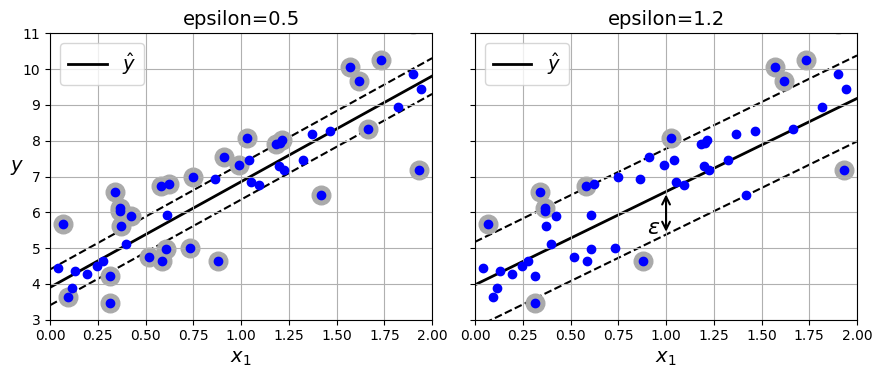

In [22]:
def find_support_vectors(svm_reg, X, y):
    # 예측값과 실제값 차이가 epsilon 이상인 샘플 인덱스 반환
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    # 회귀선과 epsilon 마진 시각화
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon

    # 회귀선과 epsilon 위아래 경계선
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)

    # 마진을 벗어난 샘플 (지원 벡터에 해당)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)

    # 전체 데이터 점
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

# epsilon=1.2인 또 다른 회귀 모델 학습
svm_reg2 = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=1.2, dual=True, random_state=42)
)
svm_reg2.fit(X, y)

# epsilon 마진을 벗어난 샘플 인덱스 저장
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

# epsilon의 시각화를 위한 한 지점의 예측값 계산
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

# 두 모델 비교 시각화
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")

# epsilon 마진을 시각화하는 이중 화살표와 텍스트 추가
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

# 그림 저장 및 출력
save_fig("svm_regression_plot")
plt.show()


비선형 회귀 문제를 다루려면 커널을 적용한 SVM 모델을 사용할 수 있음
다음 그래프는 2차 다항 커널을 사용한 SVM 회귀 예시
- 왼쪽: 정규화가 거의 없음 → 큰 C 값 사용
- 오른쪽: 정규화가 강함 → 작은 C 값 사용

In [23]:
from sklearn.svm import SVR

# 간단한 이차 데이터셋 생성 (y = 0.2 + 0.1x + 0.5x^2 + 잡음)
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# 2차 다항 커널을 사용하는 SVM 회귀 모델 구성 및 학습
svm_poly_reg = make_pipeline(
    StandardScaler(),                          # 특성 표준화
    SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)  # 다항 커널 SVR
)
svm_poly_reg.fit(X, y)  # 모델 학습


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

다음 코드는 Scikit-Learn의 SVR 클래스를 사용
(커널 트릭 지원)

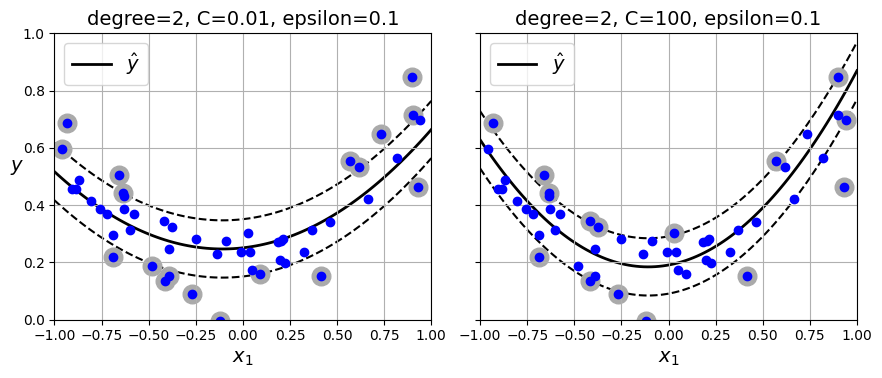

In [24]:
# SVR 모델 2개 비교 시각화

# C가 큰 SVR 모델 (정규화 적음)
svm_poly_reg2 = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=100)
)
svm_poly_reg2.fit(X, y)

# 마진 바깥 샘플 인덱스 저장
svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

# 두 모델을 나란히 시각화
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()

# 이미지 저장 및 출력
save_fig("svm_with_polynomial_kernel_plot")
plt.show()


SVR 클래스는 SVC의 회귀 버전  
LinearSVR 클래스는 LinearSVC의 회귀 버전  

LinearSVR는 훈련셋 크기에 따라 선형적으로 확장  
(이는 LinearSVC와 동일)

반면 SVR는 훈련셋이 커질수록 매우 느려짐  
(SVC와 동일한 확장성 한계)

SVM은 이상치 탐지에도 사용 가능  







## Under the Hood

SVM이 어떻게 예측을 수행하는지,
학습 알고리즘이 어떻게 작동하는지를 설명

선형 SVM 분류기부터 시작

[기호 표기법]

4장에서는 모든 모델 파라미터를 하나의 벡터 𝜃에 담는 방식 사용  
(바이어스 항 $𝜃_0$과 각 특성에 대한 가중치 $𝜃_1$부터 $𝜃_𝑛$까지 포함,  
입력 데이터에 바이어스 입력 $x_0 = 1$을 추가하는 방식)

SVM에서 더 편리하고 일반적인 표기법
- 바이어스 항: 𝑏
- 특성 가중치 벡터: 𝑤

입력 벡터에는 바이어스 특성 추가하지 않음

### Decision Function and Predictions

선형 SVM 분류기는 새로운 샘플 𝑥에 대해 결정 함수 $\mathbf{w}^\top \mathbf{x} + b = w_1 x_1 + \cdots + w_n x_n + b$
를 계산하여 클래스를 예측

이 값이 양수이면 예측된 클래스 ŷ는 양의 클래스 (1)  
그 외에는 음의 클래스 (0) 예측

$$
\hat{y} =
\begin{cases}
0 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0 \\
1 & \text{if } \mathbf{w}^\top \mathbf{x} + b \geq 0
\end{cases}
$$


다음 그래프는 이전 그래프의 왼쪽에 있는 모델에 대응하는 결정 함수

이 데이터셋은 두 개의 특성(꽃잎의 너비와 길이)을 가지므로 결정 함수는 2차원 평면  
결정 경계: 결정 함수가 0이 되는 지점들의 집합으로 두 평면이 만나는 선(굵은 실선)


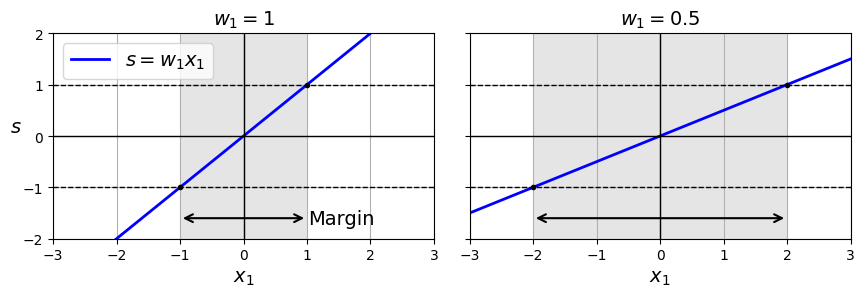

In [25]:
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)  # x1 범위 생성
    y = w * x1 + b  # 결정 함수 계산 (직선 형태)
    half_margin = 1 / w  # 마진 절반 계산 (w에 반비례)

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")  # 결정 함수 직선 그리기
    plt.axhline(y=0, color='k', linewidth=1)  # x축
    plt.axvline(x=0, color='k', linewidth=1)  # y축

    # 마진 영역 시각화 (회색 사각형)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)

    # 마진 상하 경계선 그리기 (점선)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)

    # 마진 경계점 표시 (점)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")

    plt.axis(x1_lim + [-2, 2])  # 축 범위 설정
    plt.xlabel("$x_1$")  # x축 라벨

    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)  # y축 라벨
        plt.legend()  # 범례 추가
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")  # 'Margin' 텍스트 표시

    # 마진 너비를 시각화하는 쌍방향 화살표
    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )

    plt.title(f"$w_1 = {w}$")  # 제목: 기울기 값 표시

# 두 개의 그래프를 나란히 출력
fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)  # w=1인 경우 (마진 좁음)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)  # w=0.5인 경우 (마진 넓음)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()


점선: 결정 함수의 값이 1 또는 –1이 되는 지점

이 선들은 결정 경계와 평행, 같은 거리만큼 떨어져 있어 경계 주위에 마진 형성
선형 SVM 분류기를 학습함은 이 마진을 가능한 한 넓게 만드는 𝑤와 𝑏 값을 찾는 것을 의미

이때 마진 침해를 완전히 피함(하드 마진) 또는 일정 수준까지 허용(소프트 마진)

### Training Objective

결정 함수의 기울기는 가중치 벡터의 노름 ∥𝑤∥과 같음

이 기울기를 2로 나누면 결정 함수가 ±1이 되는 지점은  결정 경계로부터 두 배 더 멀어짐  
-> 기울기를 2로 나누는 것은 마진을 2배로 늘리는 효과

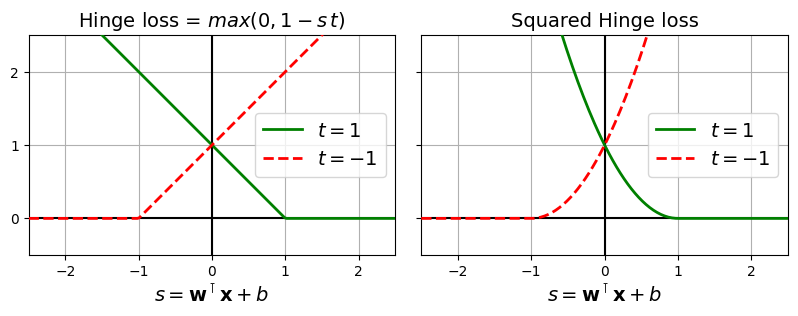

In [26]:
s = np.linspace(-2.5, 2.5, 200)  # 결정 함수 출력 s 값 범위 생성
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # 양의 클래스(t=1)에 대한 hinge 손실
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # 음의 클래스(t=-1)에 대한 hinge 손실

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))  # 두 그래프 나란히 출력

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):

    # t=1 (양성 클래스)에 대한 손실 함수 시각화
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")

    # t=-1 (음성 클래스)에 대한 손실 함수 시각화
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")

    ax.grid(True)
    ax.axhline(y=0, color='k')  # y=0 기준선
    ax.axvline(x=0, color='k')  # x=0 기준선

    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")  # 결정 함수 값 레이블
    ax.axis([-2.5, 2.5, -0.5, 2.5])  # 시각화 범위 고정
    ax.legend(loc="center right")
    ax.set_title(title)  # Hinge / Squared Hinge 제목 구분
    ax.set_yticks(np.arange(0, 2.5, 1))  # y축 눈금 고정
    ax.set_aspect("equal")  # x축, y축 비율 동일하게 유지 (왜곡 방지)

save_fig("hinge_plot")
plt.show()


Hinge Loss
- SVM의 핵심 손실 함수는 max(0, 1 - s * t)
- 마진을 만족하지 않는 예측(s가 1보다 작음)에 대해서만 손실 발생
- 이 손실은 정확히 분류되었더라도 마진 밖이면 패널티를 줌

Squared Hinge Loss 비교
- 동일한 구조이지만 $(1 - s \cdot t)^2$
로, 마진 위반에 대해 더 강한 패널티 부여
- 경사(gradient)가 연속적이고 더 크기 때문에, 일부 모델에서는 더 빠른 수렴 유도

양성/음성 클래스 각각에 대한 손실 곡선 확인
- t = 1 (양성 클래스)일 때 초록색 실선
- t = -1 (음성 클래스)일 때 빨간색 점선
- 양쪽 모두에서 𝑠=1 또는 𝑠=−1 이상이면 손실이 0이 되는 구조가 명확히 보임

직관적인 해석 가능
- 예측값 𝑠가 올바른 방향으로 충분히 크면 손실이 0
- 경계 근처에서는 작지만 빠르게 증가하는 손실
- 특히 soft margin SVM에서 C 값과 함께 이 손실이 최적화 대상

*이하 내용은 어려워서 다음에 다시 돌아오기로 함*

### Quadratic Programming

### The Dual Problem

### Kernelized SVMs


### Online SVMs